### Running ANN  using GPU

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'TITAN RTX'

In [34]:
torch.cuda.memory_cached()

2097152

In [32]:
torch.cuda.memory_allocated()

37376

In [14]:
var1=torch.FloatTensor([1.0,2.0,3.0]).cuda()

In [15]:
var1

tensor([1., 2., 3.], device='cuda:0')

In [16]:
var1.device

device(type='cuda', index=0)

In [17]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
import seaborn as sns

In [58]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


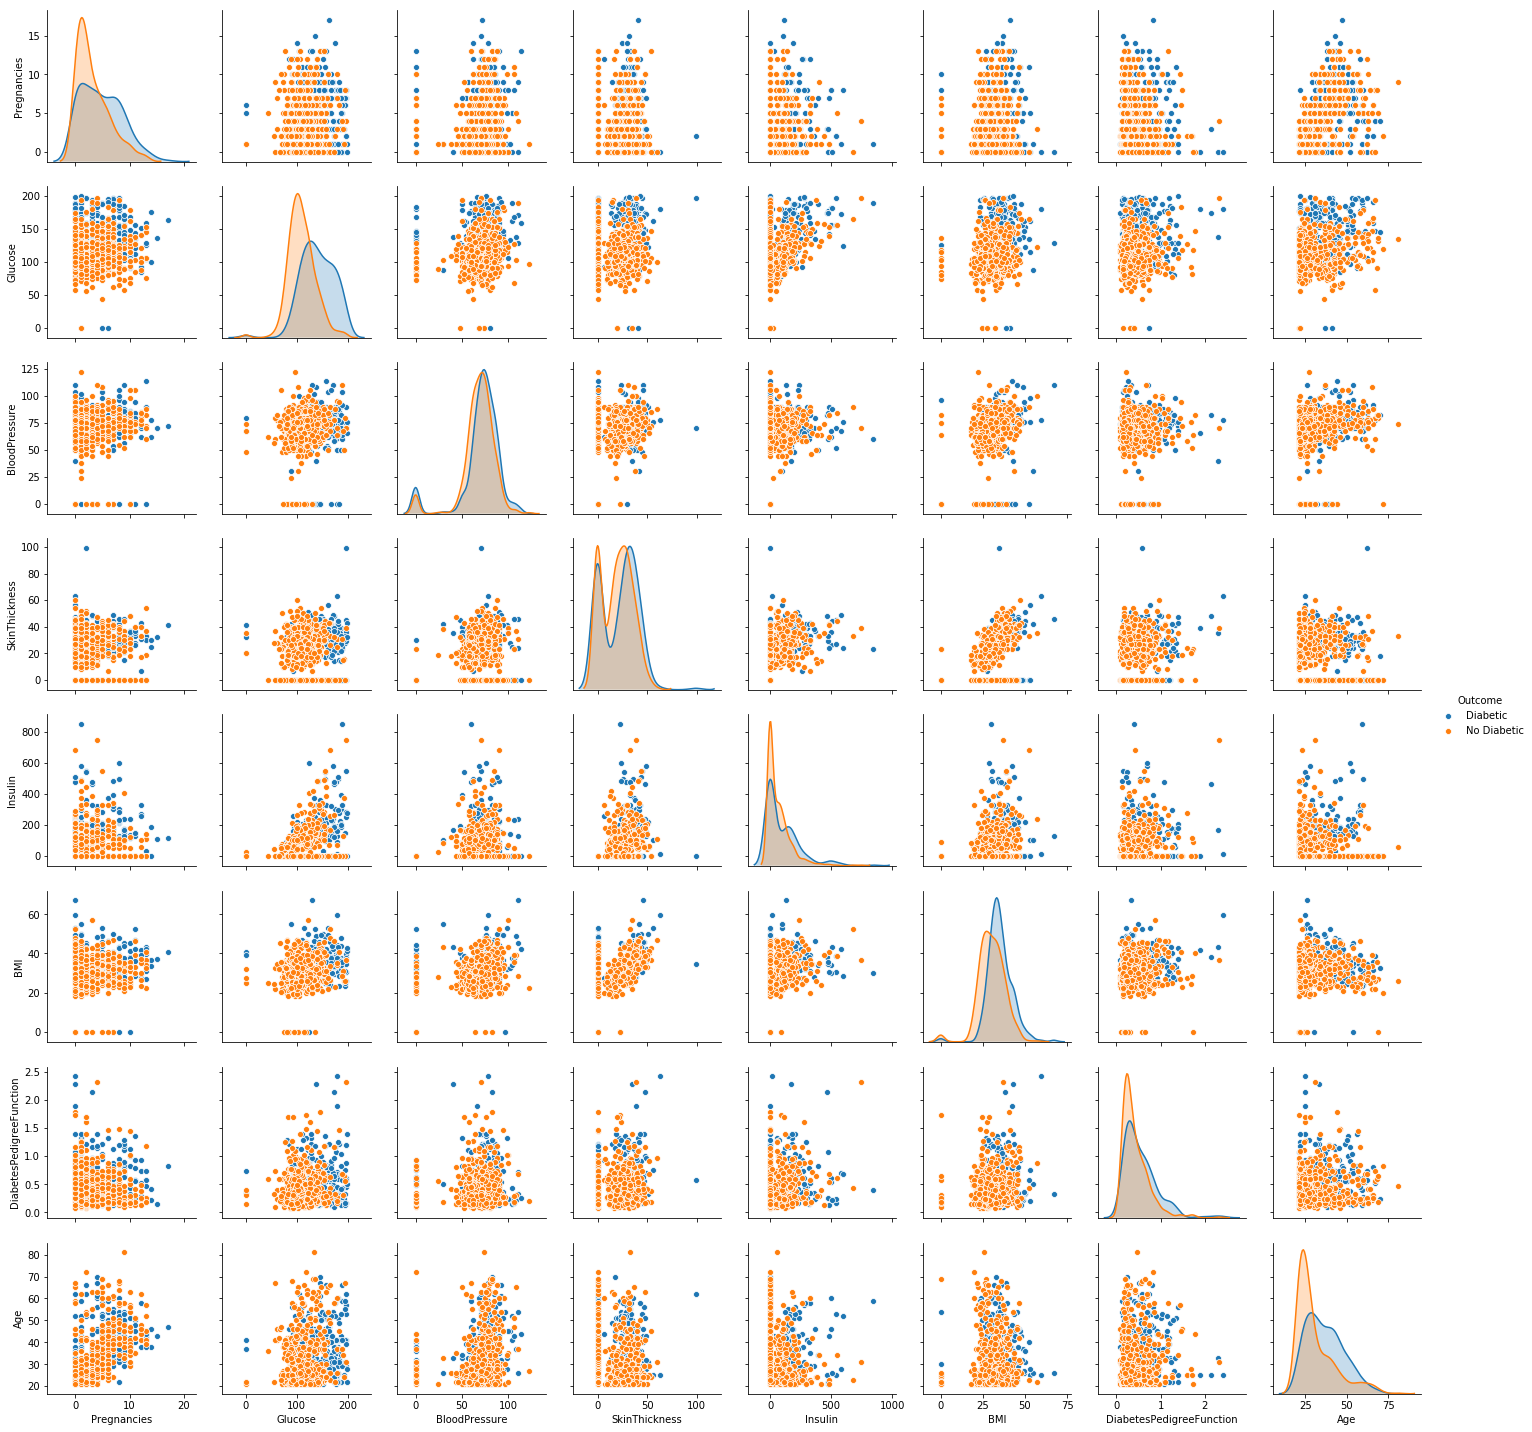

In [45]:
sns.pairplot(df,hue="Outcome")

In [18]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train).cuda()
X_test=torch.FloatTensor(X_test).cuda()
y_train=torch.LongTensor(y_train).cuda()
y_test=torch.LongTensor(y_test).cuda()


In [22]:
X_train.device

device(type='cuda', index=0)

In [23]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [27]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [28]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [31]:
for i in model.parameters():
    print(i.is_cuda)

True
True
True
True
True
True


In [30]:
model=model.cuda()

In [35]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [36]:
import time
start_time=time.time()
epochs=10000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(time.time()-start_time)

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019208312034607
Epoch number: 21 and the loss : 0.6090319752693176
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679706931114197
Epoch number: 51 and the loss : 0.5529042482376099
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971307754517
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.49834105372428894
Epoch number: 121 and the loss : 0.49605533480644226
Epoch number: 131 and the loss : 0.4828636944293976
Epoch number: 141 and the loss : 0.4756036698818207
Epoch number: 151 and the loss : 0.4799240529537201
Epoch number: 161 and the loss : 0.479287326335907
Epoch number: 171 and the loss : 0.4650002121925354
Epoch number: 181 and the loss : 0.4581999182701111
Epoch number: 191 and t

Epoch number: 1621 and the loss : 0.27327796816825867
Epoch number: 1631 and the loss : 0.24326413869857788
Epoch number: 1641 and the loss : 0.22967645525932312
Epoch number: 1651 and the loss : 0.22490860521793365
Epoch number: 1661 and the loss : 0.22328953444957733
Epoch number: 1671 and the loss : 0.22174552083015442
Epoch number: 1681 and the loss : 0.22550946474075317
Epoch number: 1691 and the loss : 0.22223719954490662
Epoch number: 1701 and the loss : 0.2238781750202179
Epoch number: 1711 and the loss : 0.2202315628528595
Epoch number: 1721 and the loss : 0.22284051775932312
Epoch number: 1731 and the loss : 0.2217070311307907
Epoch number: 1741 and the loss : 0.2198842167854309
Epoch number: 1751 and the loss : 0.558179497718811
Epoch number: 1761 and the loss : 0.48368722200393677
Epoch number: 1771 and the loss : 0.2686837315559387
Epoch number: 1781 and the loss : 0.26593688130378723
Epoch number: 1791 and the loss : 0.2505824565887451
Epoch number: 1801 and the loss : 0.

Epoch number: 3261 and the loss : 0.3185725510120392
Epoch number: 3271 and the loss : 0.23363880813121796
Epoch number: 3281 and the loss : 0.21184174716472626
Epoch number: 3291 and the loss : 0.19121846556663513
Epoch number: 3301 and the loss : 0.1895870566368103
Epoch number: 3311 and the loss : 0.18178114295005798
Epoch number: 3321 and the loss : 0.17832186818122864
Epoch number: 3331 and the loss : 0.17721906304359436
Epoch number: 3341 and the loss : 0.1755383461713791
Epoch number: 3351 and the loss : 0.17545635998249054
Epoch number: 3361 and the loss : 0.1754682958126068
Epoch number: 3371 and the loss : 0.17442947626113892
Epoch number: 3381 and the loss : 0.20285210013389587
Epoch number: 3391 and the loss : 0.17995120584964752
Epoch number: 3401 and the loss : 0.17523694038391113
Epoch number: 3411 and the loss : 0.21240761876106262
Epoch number: 3421 and the loss : 0.32135841250419617
Epoch number: 3431 and the loss : 0.2369619607925415
Epoch number: 3441 and the loss :

Epoch number: 4781 and the loss : 0.16233862936496735
Epoch number: 4791 and the loss : 0.1615479737520218
Epoch number: 4801 and the loss : 0.16110266745090485
Epoch number: 4811 and the loss : 0.16018378734588623
Epoch number: 4821 and the loss : 0.15976542234420776
Epoch number: 4831 and the loss : 0.15948699414730072
Epoch number: 4841 and the loss : 0.15864260494709015
Epoch number: 4851 and the loss : 0.15829971432685852
Epoch number: 4861 and the loss : 0.15802492201328278
Epoch number: 4871 and the loss : 0.15761859714984894
Epoch number: 4881 and the loss : 0.15707704424858093
Epoch number: 4891 and the loss : 0.15788902342319489
Epoch number: 4901 and the loss : 0.15629057586193085
Epoch number: 4911 and the loss : 0.1585066169500351
Epoch number: 4921 and the loss : 0.15667422115802765
Epoch number: 4931 and the loss : 0.16016007959842682
Epoch number: 4941 and the loss : 0.155496284365654
Epoch number: 4951 and the loss : 0.17268989980220795
Epoch number: 4961 and the loss 

Epoch number: 6461 and the loss : 0.15724080801010132
Epoch number: 6471 and the loss : 0.12960857152938843
Epoch number: 6481 and the loss : 0.2099720984697342
Epoch number: 6491 and the loss : 0.14142386615276337
Epoch number: 6501 and the loss : 0.16307292878627777
Epoch number: 6511 and the loss : 0.14103959500789642
Epoch number: 6521 and the loss : 0.13429774343967438
Epoch number: 6531 and the loss : 0.12753784656524658
Epoch number: 6541 and the loss : 0.1263204663991928
Epoch number: 6551 and the loss : 0.1231827512383461
Epoch number: 6561 and the loss : 0.1268501728773117
Epoch number: 6571 and the loss : 0.11953722685575485
Epoch number: 6581 and the loss : 0.14294572174549103
Epoch number: 6591 and the loss : 0.7421388030052185
Epoch number: 6601 and the loss : 0.3701583743095398
Epoch number: 6611 and the loss : 0.2707122266292572
Epoch number: 6621 and the loss : 0.295569509267807
Epoch number: 6631 and the loss : 0.16851778328418732
Epoch number: 6641 and the loss : 0.1

Epoch number: 8121 and the loss : 0.0957619696855545
Epoch number: 8131 and the loss : 0.09631633758544922
Epoch number: 8141 and the loss : 0.09767057746648788
Epoch number: 8151 and the loss : 1.0549325942993164
Epoch number: 8161 and the loss : 0.5237001776695251
Epoch number: 8171 and the loss : 0.330216646194458
Epoch number: 8181 and the loss : 0.2232804149389267
Epoch number: 8191 and the loss : 0.15781749784946442
Epoch number: 8201 and the loss : 0.12288744002580643
Epoch number: 8211 and the loss : 0.11219694465398788
Epoch number: 8221 and the loss : 0.10605739057064056
Epoch number: 8231 and the loss : 0.1029459536075592
Epoch number: 8241 and the loss : 0.10099644958972931
Epoch number: 8251 and the loss : 0.09953418374061584
Epoch number: 8261 and the loss : 0.09879318624734879
Epoch number: 8271 and the loss : 0.09838821738958359
Epoch number: 8281 and the loss : 0.09700050204992294
Epoch number: 8291 and the loss : 0.09667719900608063
Epoch number: 8301 and the loss : 0

Epoch number: 9641 and the loss : 0.08239708095788956
Epoch number: 9651 and the loss : 0.08175382763147354
Epoch number: 9661 and the loss : 0.08158065378665924
Epoch number: 9671 and the loss : 0.08168786019086838
Epoch number: 9681 and the loss : 0.08266275376081467
Epoch number: 9691 and the loss : 0.08297120779752731
Epoch number: 9701 and the loss : 0.08315917104482651
Epoch number: 9711 and the loss : 0.08032385259866714
Epoch number: 9721 and the loss : 0.08129468560218811
Epoch number: 9731 and the loss : 0.08035381138324738
Epoch number: 9741 and the loss : 0.08195021748542786
Epoch number: 9751 and the loss : 0.080034539103508
Epoch number: 9761 and the loss : 0.07996789366006851
Epoch number: 9771 and the loss : 0.07996265590190887
Epoch number: 9781 and the loss : 0.07925032824277878
Epoch number: 9791 and the loss : 0.07827688753604889
Epoch number: 9801 and the loss : 0.08138955384492874
Epoch number: 9811 and the loss : 0.07756228744983673
Epoch number: 9821 and the los

In [26]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

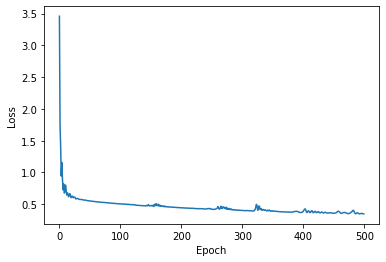

In [27]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [31]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [15, 32]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

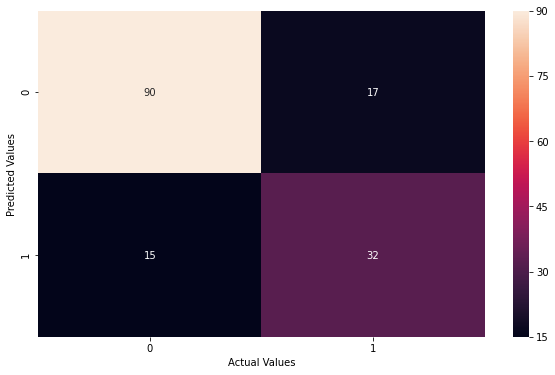

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [36]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [38]:
#### Save the model
torch.save(model,'diabetes.pt')

In [39]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [40]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [41]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [43]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [44]:
new_data=torch.tensor(lst1)

In [46]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1148, 1.4219])
1
